In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

## Loading the Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## EDA

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

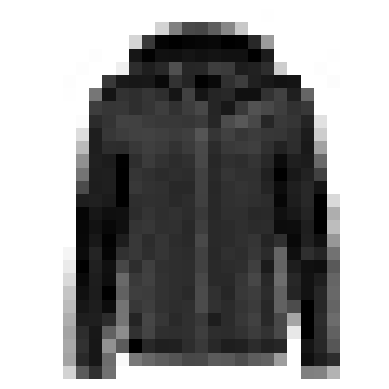

In [7]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [8]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

## Training the Neural Network

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

C:\Users\Zeeshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
keras.utils.plot_model(model, "fmnist_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights.shape

(784, 300)

### Model Training with Adam Optimizer

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7809 - loss: 0.6171 - val_accuracy: 0.8676 - val_loss: 0.3722
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8606 - loss: 0.3735 - val_accuracy: 0.8774 - val_loss: 0.3418
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8789 - loss: 0.3323 - val_accuracy: 0.8818 - val_loss: 0.3330
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8864 - loss: 0.3063 - val_accuracy: 0.8780 - val_loss: 0.3311
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8924 - loss: 0.2854 - val_accuracy: 0.8858 - val_loss: 0.3279
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9018 - loss: 0.2669 - val_accuracy: 0.8840 - val_loss: 0.3227
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2566 - val_accuracy: 0.8858 - val_loss: 0.3276
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9103 - loss: 0.2406 - 

In [20]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

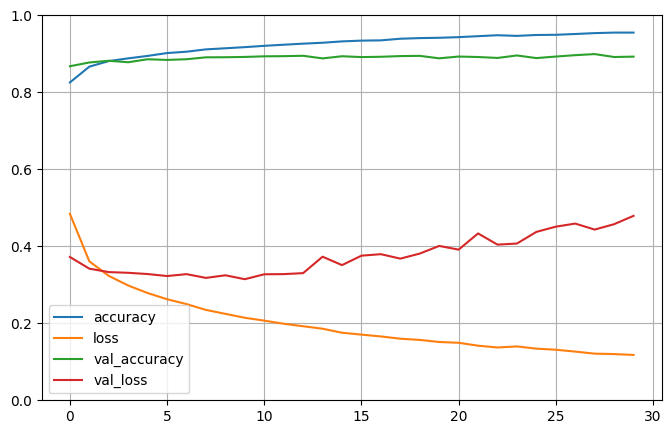

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.5199


[0.5242280960083008, 0.8794999718666077]

## Model Training with SDG Optimizer

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_sgd = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9467 - loss: 0.1408 - val_accuracy: 0.9022 - val_loss: 0.4566
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9553 - loss: 0.1156 - val_accuracy: 0.9020 - val_loss: 0.4577
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9575 - loss: 0.1083 - val_accuracy: 0.9022 - val_loss: 0.4572
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9595 - loss: 0.1040 - val_accuracy: 0.9030 - val_loss: 0.4585
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9608 - loss: 0.1007 - val_accuracy: 0.9040 - val_loss: 0.4606
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9614 - loss: 0.0982 - val_accuracy: 0.9042 - val_loss: 0.4623
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9623 - loss: 0.0962 - val_accuracy: 0.9034 - val_loss: 0.4634
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9630 - loss: 0.09

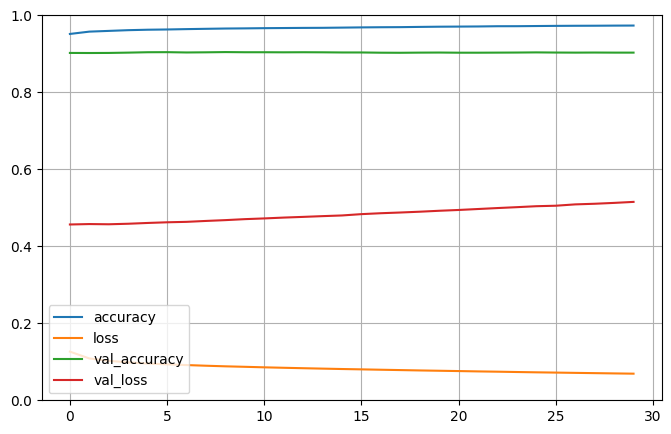

In [29]:
import pandas as pd

pd.DataFrame(history_sgd.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8892 - loss: 0.5589


[0.5552735328674316, 0.892799973487854]

## Testing

In [31]:
X_new = X_test[:3]

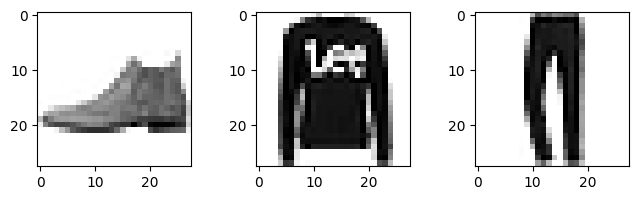

In [32]:
plt.figure(figsize=(8, 2))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [33]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')